In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Reading the data
TicketData=pd.read_csv('new_title.csv')

# Printing number of rows and columns
print(TicketData.shape)

# Printing sample rows
TicketData.head(10)

(350, 3)


,id,title,Discipline 1
0,50564,"Murray, JW (2003): Oxygen and salinity measure...",Biochemistry
1,50565,"Nahrgang, J; Camus, L; Broms, F et al. (2010):...",Biochemistry
2,51555,"Hüning, AK; Melzner, F; Thomsen, J et al. (201...",Biochemistry
3,51852,"Curry, WB; Duplessy, J-C; Labeyrie, LD et al. ...",Biogeochemistry
4,52134,"Grebmeier, JM; McRoy, CP (2002): Benthic respi...",Biogeochemistry
5,52137,"Varela, M; Fernández, E (2003): Fractionated c...",Biogeochemistry
6,52205,"Garside, C (2003): Low level nitrate concentra...",Biogeochemistry
7,52241,"Peltzer, ET (2003): Total organic carbon at st...",Biogeochemistry
8,52243,"Peltzer, ET (2003): Total organic carbon at st...",Biogeochemistry
9,52244,"Hansell, DA (2003): Total organic carbon at st...",Biogeochemistry


Discipline 1
Biochemistry               3
Biogeochemistry           61
Biology                    3
Chemical Oceanography      1
Chemistry                  5
Climatology                1
Ecology                   44
Marine Geology            16
Microbiology              70
Multidisciplinary          1
Ocean Optics               1
Ocean optics               2
Paleoceanography         115
Physical Oceanography     25
Unknown                    2
dtype: int64


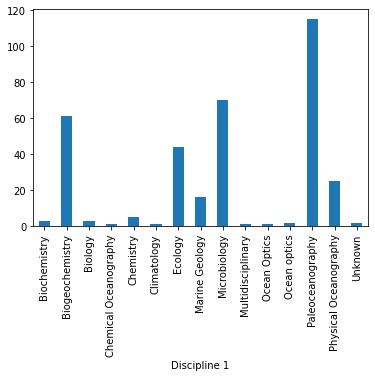

In [43]:

# Number of unique values for urgency column
# You can see there are 3 ticket types
print(TicketData.groupby('Discipline 1').size())
 
# Plotting the bar chart
%matplotlib inline
TicketData.groupby('Discipline 1').size().plot(kind='bar');

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = TicketData['title'].values
 
corpus

array(['Murray, JW (2003): Oxygen and salinity measured on water bottle samples at station TT007_15-CTD154',
       'Nahrgang, J; Camus, L; Broms, F et al. (2010): Physiological and biochemical characteristics of polar cod (Boreogadus saida) from Kongsfjorden',
       'Hüning, AK; Melzner, F; Thomsen, J et al. (2013): Impacts of seawater acidification on mantle gene expression patterns of the Baltic Sea blue mussel: implications for shell formation and energy metabolism, link to supplementary material',
       'Curry, WB; Duplessy, J-C; Labeyrie, LD et al. (1988): (Appendix 1) Stable carbon and oxygen isotope ratios of Cibicidoides spp. from sediment core RC11-120',
       'Grebmeier, JM; McRoy, CP (2002): Benthic respiration at Cruise73_122',
       'Varela, M; Fernández, E (2003): Fractionated chlorophyll-a at station Fruela95_39.1',
       'Garside, C (2003): Low level nitrate concentrations at station TT053_13-17',
       'Peltzer, ET (2003): Total organic carbon at station TT049_1

In [45]:
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

In [46]:
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
X


<350x1973 sparse matrix of type '<class 'numpy.int64'>'
	with 4862 stored elements in Compressed Sparse Row format>

In [47]:
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Discipline']=TicketData['Discipline 1']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(350, 1974)


,01,02,03,04_pc23a,04a,05,06,07,08,09,...,zhao,ziegler,zielinski,zone,zonneveld,zooplankton,zorrilla,µm,¹³c,Discipline
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Biochemistry
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Biochemistry
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Biochemistry
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Biogeochemistry
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Biogeochemistry


In [48]:
import gensim

In [49]:
# !python -m pip install gensim

In [50]:
import gensim
#Loading the word vectors from Google trained word2Vec model
# GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\eafzadn\\Trace\\GoogleNews-vectors-negative300.bin', binary=True)
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [51]:
WordsVocab=CountVectorizedData.columns[:-1]
print(WordsVocab)

Index(['01', '02', '03', '04_pc23a', '04a', '05', '06', '07', '08', '09',
       ...
       'zeri', 'zhao', 'ziegler', 'zielinski', 'zone', 'zonneveld',
       'zooplankton', 'zorrilla', 'µm', '¹³c'],
      dtype='object', length=1973)


In [52]:
'RC11' in GoogleModel.key_to_index.keys()

False

In [69]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i,:]]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [54]:
# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(TicketData['title'])

# Checking the new representation for sentences


In [55]:
W2Vec_Data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
W2Vec_Data.to_csv("adnan.csv")

In [57]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Discipline']=CountVectorizedData['Discipline']

# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Discipline
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biochemistry
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biochemistry
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biochemistry
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biogeochemistry
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biogeochemistry


In [58]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(245, 300)
(245,)
(105, 300)
(105,)


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is used because we need to fit Naive Bayes

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(245, 300)
(245,)
(105, 300)
(105,)


In [60]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

MultinomialNB()
                       precision    recall  f1-score   support

         Biochemistry       0.00      0.00      0.00         1
      Biogeochemistry       0.00      0.00      0.00        19
              Biology       0.00      0.00      0.00         1
Chemical Oceanography       0.00      0.00      0.00         1
            Chemistry       0.00      0.00      0.00         1
              Ecology       0.00      0.00      0.00        14
       Marine Geology       0.00      0.00      0.00         2
         Microbiology       0.00      0.00      0.00        21
         Ocean optics       0.00      0.00      0.00         1
     Paleoceanography       0.30      1.00      0.47        32
Physical Oceanography       0.00      0.00      0.00        12

             accuracy                           0.30       105
            macro avg       0.03      0.09      0.04       105
         weighted avg       0.09      0.30      0.14       105

[[ 0  0  0  0  0  0  0  0  0  1  0]


In [61]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=15)
                       precision    recall  f1-score   support

         Biochemistry       0.00      0.00      0.00         1
      Biogeochemistry       0.00      0.00      0.00        19
              Biology       0.00      0.00      0.00         1
Chemical Oceanography       0.00      0.00      0.00         1
            Chemistry       0.00      0.00      0.00         1
              Ecology       0.00      0.00      0.00        14
       Marine Geology       0.00      0.00      0.00         2
         Microbiology       0.00      0.00      0.00        21
         Ocean optics       0.00      0.00      0.00         1
     Paleoceanography       0.30      1.00      0.47        32
Physical Oceanography       0.00      0.00      0.00        12

             accuracy                           0.30       105
            macro avg       0.03      0.09      0.04       105
         weighted avg       0.09      0.30      0.14       105

[[ 0  0  0  0  

DecisionTreeClassifier(max_depth=20)
                       precision    recall  f1-score   support

         Biochemistry       0.00      0.00      0.00         1
      Biogeochemistry       0.00      0.00      0.00        19
              Biology       0.00      0.00      0.00         1
Chemical Oceanography       0.00      0.00      0.00         1
            Chemistry       0.00      0.00      0.00         1
              Ecology       0.00      0.00      0.00        14
       Marine Geology       0.00      0.00      0.00         2
         Microbiology       0.00      0.00      0.00        21
         Ocean optics       0.00      0.00      0.00         1
     Paleoceanography       0.30      1.00      0.47        32
Physical Oceanography       0.00      0.00      0.00        12

             accuracy                           0.30       105
            macro avg       0.03      0.09      0.04       105
         weighted avg       0.09      0.30      0.14       105

[[ 0  0  0  0  

<AxesSubplot:>

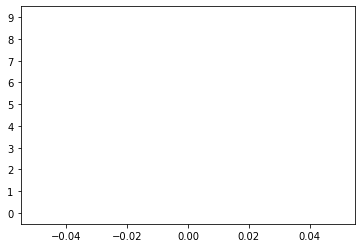

In [62]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [63]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
#%matplotlib inline
#feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
                       precision    recall  f1-score   support

         Biochemistry       0.00      0.00      0.00         1
      Biogeochemistry       0.00      0.00      0.00        19
              Biology       0.00      0.00      0.00         1
Chemical Oceanography       0.00      0.00      0.00         1
            Chemistry       0.00      0.00      0.00         1
              Ecology       0.00      0.00      0.00        14
       Marine Geology       0.00      0.00      0.00         2
         Microbiology       0.00      0.00      0.00        21
         Ocean optics       0.00      0.00      0.00         1
     Paleoceanography       0.30      1.00      0.47        32
Physical Oceanography       0.00      0.00      0.00        12

             accuracy                           0.30       105
            macro avg       0.03      0.09      0.04

In [64]:
# Generating the Logistic model on full data
# This is the best performing model
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
FinalModel=clf.fit(X,y)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Defining a function which converts words into numeric vectors for prediction
def FunctionPredictUrgency(inpText):
    
    # Generating the Glove word vector embeddings
    X=FunctionText2Vec(inpText)
    #print(X)
    
    # If standardization/normalization was done on training
    # then the above X must also be converted to same platform
    # Generating the normalized values of X
    X=PredictorScalerFit.transform(X)
    
    # Generating the prediction using Naive Bayes model and returning
    Prediction=FinalModel.predict(X)
    Result=pd.DataFrame(data=inpText, columns=['Text'])
    Result['Prediction']=Prediction
    return(Result)

In [ ]:
# Calling the function
NewTicket=["Garside, C (2003): Low level nitrate concentrations at station TT053_13-17"]
FunctionPredictUrgency(inpText=NewTicket)

In [ ]:
import numpy as np
# Calling the function
NewTicket=pd.read_csv('unknown.csv')
#NewTicket=["Mix, AC; Ruddiman, WF; McIntyre, A (1986): (Table 2) Age model of sediment core V22-222"]
NewTicket
NT=NewTicket['title'].values
len(NT)
#for tick in NT:
     
PredictionResults=FunctionPredictUrgency(inpText=NT)


PredictionResults
NT
PredictionResults.to_csv('PredictionResults_word2vec.csv',index=False)